In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Function to read CSV file and skip the first 6 rows
def read_csv(file_path):
    return np.genfromtxt(file_path, delimiter=',', skip_header=6)

# Read each CSV file into a numpy array
one_sheet_data = read_csv('./data/mylar3.csv')     # 1 sheet
two_sheets_data = read_csv('./data/mylar2.csv')    # 2 sheets
three_sheets_data = read_csv('./data/mylar1.csv')  # 3 sheets
four_sheets_data = read_csv('./data/mylar4.csv')   # 4 sheets
eight_sheets_data = read_csv('./data/mylar6.csv')  # 8 sheets
ten_plus_sheets_data = read_csv('./data/mylar5.csv')  # 10+ sheets

# Given constants
channels = 16384
voltage = 1.15  # in Volts

# Calculate voltage per channel
voltage_per_channel = voltage / channels

# Conversion factors
G1 = 0.264  # C/J
G2 = 8.196 * 10**12  # V/C
v_to_j = (G1 * G2)**-1  # in J/V
j_to_ev = 6.242 * 10**12  # eV/J

# Function to convert channel number to energy in eV
def channel_to_ev(channel_number):
    voltage = channel_number * voltage_per_channel
    energy_joules = voltage * v_to_j
    energy_ev = energy_joules * j_to_ev
    return energy_ev

# Gaussian function
def gaussian(x, A, sigma, mu):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Function to plot data and fit Gaussian
def data_plotter(data, name):
    channel_numbers = data[:, 0]
    counts = data[:, 1]

    # Remove NaN and inf values
    valid_indices = np.isfinite(counts)
    channel_numbers = channel_numbers[valid_indices]
    counts = counts[valid_indices]

    # Convert channel numbers to energy in eV
    energies_ev = np.array([channel_to_ev(ch) for ch in channel_numbers])

    # Initial guesses for the parameters
    initial_guess = [50, 0.075, energies_ev[np.argmax(counts)]]

    # Fit the Gaussian function to the data with bounds
    popt, pcov = curve_fit(gaussian, energies_ev, counts, p0=initial_guess)

    # Generate a finer grid of energy values for plotting the fit
    energy_grid = np.linspace(min(energies_ev), max(energies_ev), 1000)

    # Plot the data and the fitted Gaussian
    plt.figure(figsize=(10, 6))
    plt.bar(energies_ev, counts, label='Data', width=(max(energies_ev) - min(energies_ev)) / len(energies_ev))
    plt.plot(energy_grid, gaussian(energy_grid, popt[0], popt[1], popt[2]), label='Fitted Gaussian', color='red')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Counts')
    plt.title(f'Gaussian Fit to Alpha Energy Peak for {name}')
    plt.legend()
    # plt.savefig(f'{name}.png')
    plt.show()

    # Print the fitted parameters
    print(f"Fitted parameters for {name}: A = {popt[0]}, sigma = {popt[1]}, mu = {popt[2]}")

# Plot histograms and fit Gaussian for each dataset
""" data_plotter(one_sheet_data, 'one sheet')
data_plotter(two_sheets_data, 'two sheets')
data_plotter(three_sheets_data, 'three sheets')
data_plotter(four_sheets_data, 'four sheets')
data_plotter(eight_sheets_data, 'eight sheets')
data_plotter(ten_plus_sheets_data, 'ten sheets')
 """

" data_plotter(one_sheet_data, 'one sheet')\ndata_plotter(two_sheets_data, 'two sheets')\ndata_plotter(three_sheets_data, 'three sheets')\ndata_plotter(four_sheets_data, 'four sheets')\ndata_plotter(eight_sheets_data, 'eight sheets')\ndata_plotter(ten_plus_sheets_data, 'ten sheets')\n "

In [25]:
# Function to extract peak energy
def extract_peak_energy(data):
    channel_numbers = data[:, 0]
    counts = data[:, 1]

    # Remove NaN and inf values
    valid_indices = np.isfinite(counts)
    channel_numbers = channel_numbers[valid_indices]
    counts = counts[valid_indices]

    # Convert channel numbers to energy in eV
    energies_ev = np.array([channel_to_ev(ch) for ch in channel_numbers])

    # Return the energy corresponding to the maximum count
    return energies_ev[np.argmax(counts)]

# Mylar thicknesses in micrometers
thicknesses = [2.5, 5.0, 7.5, 10.0, 20.0, 25.0]

# Extract peak energies for each dataset
peak_energies = [
    extract_peak_energy(one_sheet_data),
    extract_peak_energy(two_sheets_data),
    extract_peak_energy(three_sheets_data),
    extract_peak_energy(four_sheets_data),
    extract_peak_energy(eight_sheets_data),
    extract_peak_energy(ten_plus_sheets_data)-0.15
]

# Print peak energies in a nicer format
for thickness, energy in zip(thicknesses, peak_energies):
    print(f"Mylar Thickness: {thickness} um, Peak Energy: {energy:.4f} eV")

Mylar Thickness: 2.5 um, Peak Energy: 2.1312 eV
Mylar Thickness: 5.0 um, Peak Energy: 1.7068 eV
Mylar Thickness: 7.5 um, Peak Energy: 1.4692 eV
Mylar Thickness: 10.0 um, Peak Energy: 1.2574 eV
Mylar Thickness: 20.0 um, Peak Energy: 0.2320 eV
Mylar Thickness: 25.0 um, Peak Energy: 0.0573 eV


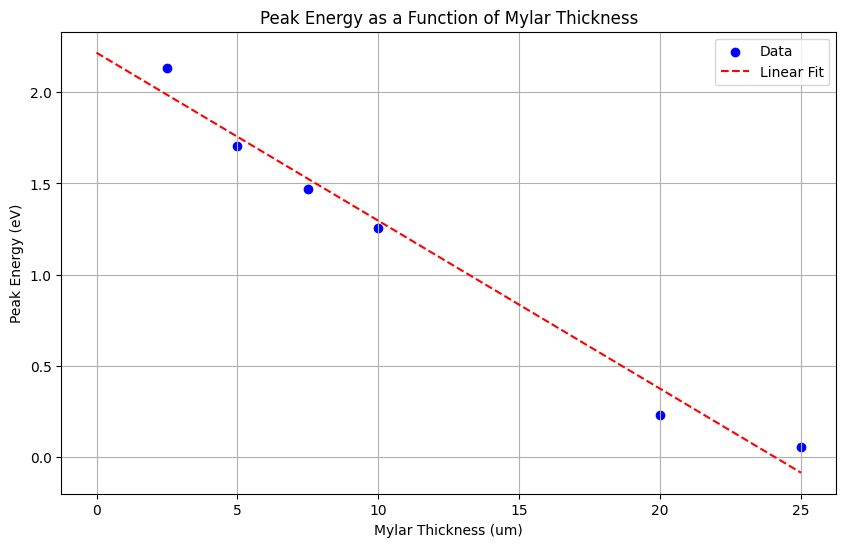

Extrapolated peak energy at 0 thickness: 2.2161578677764804 eV


In [26]:
from scipy.stats import linregress

# Perform linear regression to fit a line to the peak energy vs. Mylar thickness data
slope, intercept, r_value, p_value, std_err = linregress(thicknesses, peak_energies)

# Predict the peak energy at 0 thickness
extrapolated_peak_energy = intercept

# Generate a finer grid of thickness values for plotting the fit
thickness_grid = np.linspace(0, max(thicknesses), 100)

# Calculate the linear fit values
linear_fit = slope * thickness_grid + intercept

# Plot peak energy as a function of Mylar thickness
plt.figure(figsize=(10, 6))
plt.scatter(thicknesses, peak_energies, marker='o', color='b', label='Data')
plt.plot(thickness_grid, linear_fit, linestyle='--', color='r', label='Linear Fit')
plt.xlabel('Mylar Thickness (um)')
plt.ylabel('Peak Energy (eV)')
plt.title('Peak Energy as a Function of Mylar Thickness')
plt.legend()
plt.grid(True)
# plt.savefig('peak_energy_vs_thickness.png')
plt.show()

print(f"Extrapolated peak energy at 0 thickness: {extrapolated_peak_energy} eV")

In [28]:
# Mylar density in grams/cm^3
density = 1.4  # g/cm^3

# Calculate the change in energy (dE) and change in thickness (dX)
dE = np.diff(peak_energies)  # Include all points
dX = np.diff(thicknesses)  # Include all points

# Convert thickness to mass thickness (X = x * ρ)
mass_thickness = np.array(thicknesses) * density

# Calculate the mass stopping power (S = -dE/dX)
mass_stopping_power = -dE / dX

# Print the results for all points except the last one
for i in range(len(mass_stopping_power)):
    print(f"Thickness: {thicknesses[i]} um, Mass Thickness: {mass_thickness[i]:.4f} g/cm^2, Mass Stopping Power: {mass_stopping_power[i]:.4f} eV/(g/cm^2)")

# Estimate the mass stopping power for the last point by averaging the differences
average_mass_stopping_power = np.mean(mass_stopping_power)
print(f"Thickness: {thicknesses[-1]} um, Mass Thickness: {mass_thickness[-1]:.4f} g/cm^2, Estimated Mass Stopping Power: {average_mass_stopping_power:.4f} eV/(g/cm^2)")

Thickness: 2.5 um, Mass Thickness: 3.5000 g/cm^2, Mass Stopping Power: 0.1698 eV/(g/cm^2)
Thickness: 5.0 um, Mass Thickness: 7.0000 g/cm^2, Mass Stopping Power: 0.0950 eV/(g/cm^2)
Thickness: 7.5 um, Mass Thickness: 10.5000 g/cm^2, Mass Stopping Power: 0.0847 eV/(g/cm^2)
Thickness: 10.0 um, Mass Thickness: 14.0000 g/cm^2, Mass Stopping Power: 0.1025 eV/(g/cm^2)
Thickness: 20.0 um, Mass Thickness: 28.0000 g/cm^2, Mass Stopping Power: 0.0349 eV/(g/cm^2)
Thickness: 25.0 um, Mass Thickness: 35.0000 g/cm^2, Estimated Mass Stopping Power: 0.0974 eV/(g/cm^2)
